In [3]:
import pandas as pd             # PANDAS IS A DATAframe lib
import matplotlib.pyplot as plt  # matplotlib.pyplot plots the data
import numpy as np               # numpy supports N-dim object support 

import seaborn as sns            # Seaborn visualization library
# do plotting inline instead of separate window
%matplotlib inline


## Load and review data

In [4]:
bike_day=pd.read_csv("day.csv")

In [5]:
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
bike_day.shape

(731, 16)

## Checking for Missing Values


In [7]:
bike_day.isnull().values.any()

False

## EDA

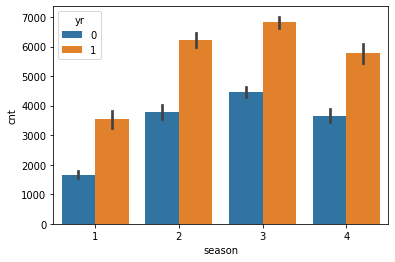

In [8]:
# lets see the count of bikes according to the season and yr

plt.figure()
sns.barplot(x='season',y='cnt',data=bike_day, hue='yr')

we see the bike rentals increased from yr 2011 to 2012 and are highest in season 3 that is summer

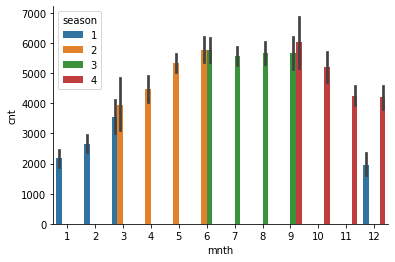

In [16]:
# lets see in which month the rentals are highest

sns.barplot(x='mnth',y='cnt',data=bike_day, hue='season')
sns.despine(right=True)

Bike rentals are maximum in month 6- starting of summer and month 9 -starting of fall

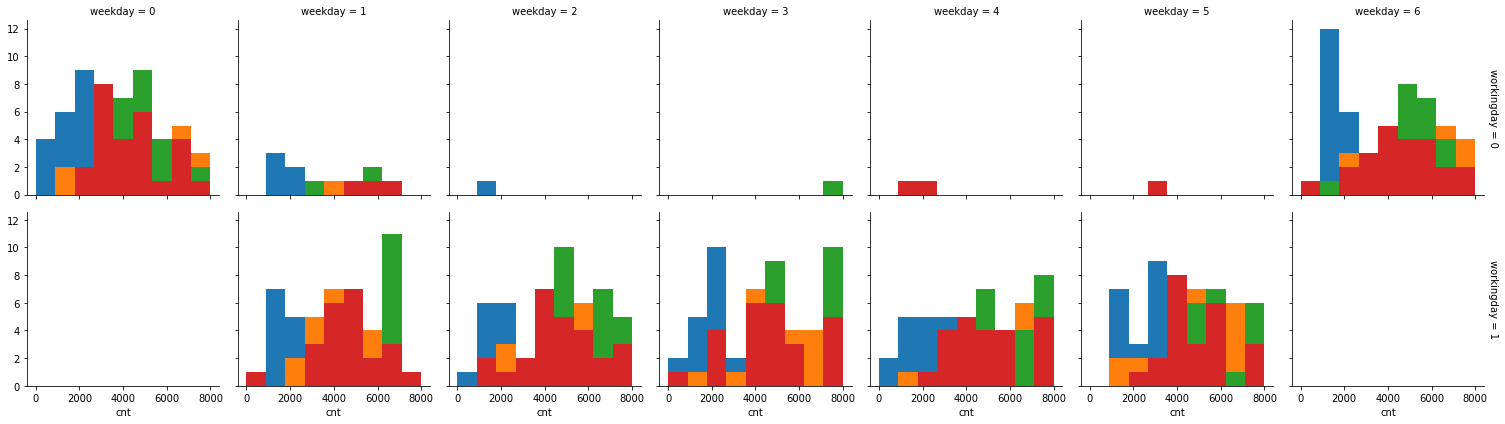

In [38]:
g=sns.FacetGrid(bike_day,row='workingday',col='weekday',margin_titles='true',hue='season',legend_out=True)
bins = np.linspace(0, 8000, 10)
g.map(plt.hist,"cnt", bins=bins)

In [ ]:
# checking for pairing among features
#pd.plotting.scatter_matrix(bike_new_day[['season','atemp','mnth','cnt']], figsize=(15,15))
#plt.show()

sns.pairplot(bike_new_day,vars=['season','atemp','mnth','cnt'])

## Checking for correlation among variables

In [39]:
#Keeping season and environment features for predicting count
bike_new_day= bike_day[['season','yr','mnth','weekday','workingday','weathersit','atemp','hum','windspeed','cnt']]

In [40]:
bike_new_day.corr()['cnt'].sort_values()

weathersit   -0.297391
windspeed    -0.234545
hum          -0.100659
workingday    0.061156
weekday       0.067443
mnth          0.279977
season        0.406100
yr            0.566710
atemp         0.631066
cnt           1.000000
Name: cnt, dtype: float64

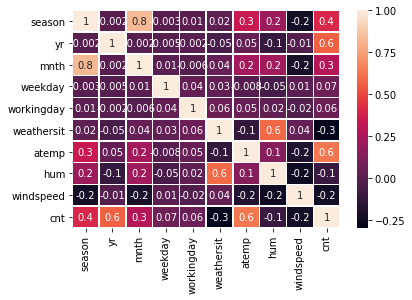

In [48]:
#creating a heatmap of correlations
sns.heatmap(bike_new_day.corr(),annot=True,fmt=".1g",linewidths=0.5)


year,atemp and season are major correlated features of  bike counts

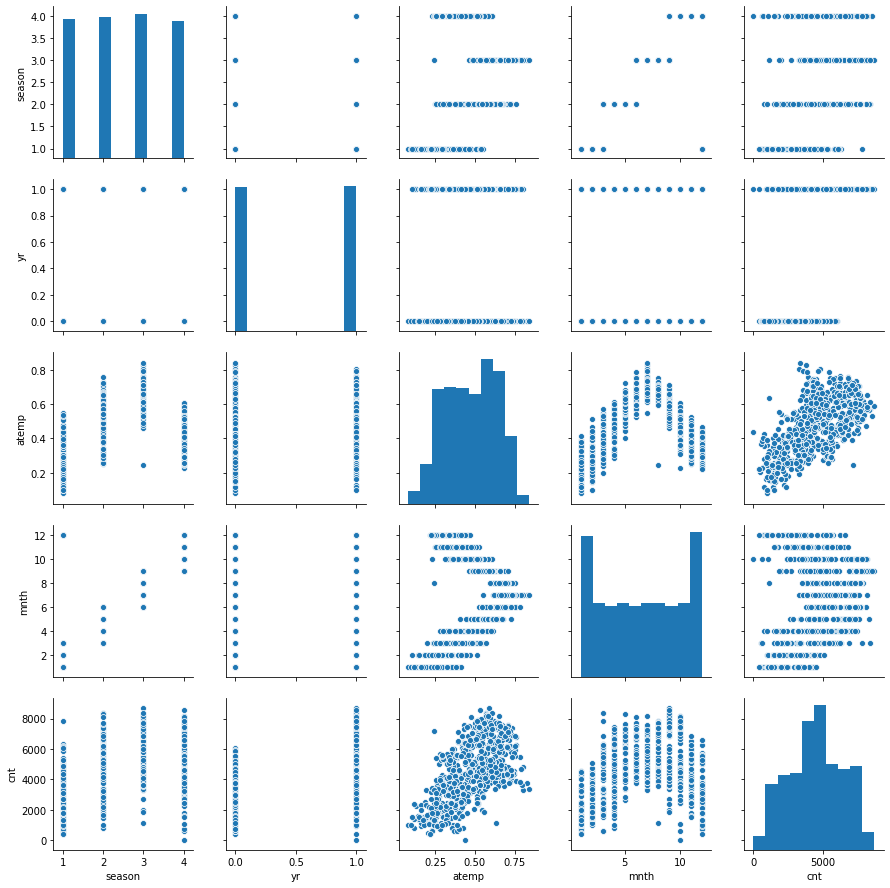

In [50]:
# checking for pairing among correlated features
#pd.plotting.scatter_matrix(bike_new_day[['season','atemp','mnth','cnt']], figsize=(15,15))
#plt.show()

sns.pairplot(bike_new_day,vars=['season','yr','atemp','mnth','cnt'])


## Training data


In [79]:

from sklearn.linear_model import LinearRegression,Lasso, LassoCV
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


from sklearn.metrics import mean_squared_error, r2_score

## Splitting the data into train test set

In [114]:
from sklearn.model_selection import train_test_split

X = bike_new_day.drop(['cnt','weathersit','hum','windspeed'], axis=1)
y = bike_new_day['cnt']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)


In [115]:
X_train.shape

(548, 6)

In [116]:
X_test.shape

(183, 6)

In [118]:
X_train.head()

,season,yr,mnth,weekday,workingday,atemp
521,2,1,6,2,1,0.525892
147,2,0,5,6,0,0.612379
472,2,1,4,2,1,0.598487
635,4,1,9,4,1,0.607975
331,4,0,11,1,1,0.490122


 Lets calculate the naive baseline of the training data for all the testing set to compare our regression rmse with that

In [108]:
 y_train.median()

4643.5

In [119]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
   # mae = np.mean(abs(predictions - true))
   # rmse = np.sqrt(np.mean((predictions - true) ** 2))
    mse= mean_squared_error(true, predictions)
    return  mse

# Naive baseline is the median
median_pred = y_train.median()
median_preds = [median_pred for _ in range(len(y_test))]
true = y_test

In [120]:
# Display the naive baseline metrics
mse = evaluate_predictions(median_preds, true)
#print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print("Median Baseline MSE:%.4f" % mse)
print("RMSE: ", np.sqrt(mse))

Median Baseline MSE:4147779.1899
RMSE:  2036.6097294009744


In [121]:

lr=LinearRegression()
#dt=DecisionTreeRegressor()
#rf = RandomForestRegressor(n_estimators=5)
ls=Lasso(random_state=0, max_iter=10000)
lsv=LassoCV(cv=5,random_state=1,max_iter=10000)
#gb = GradientBoostingRegressor(n_estimators=20)


The model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
945.8284545549476
The Coefficients:: [ 477.33256372 2145.02497957  -37.44671671   80.67700352   48.98221181
 6222.21023343]
6
Variance score: 0.77


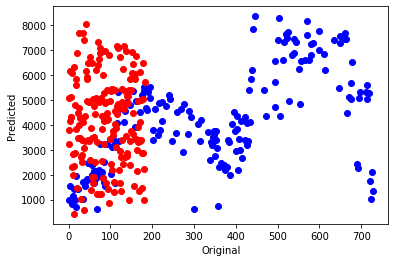

The model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)
946.2147392105869
The Coefficients:: [ 476.39837064 2141.54622438  -36.67983556   80.43327537   44.84994312
 6180.5655406 ]
6
Variance score: 0.77


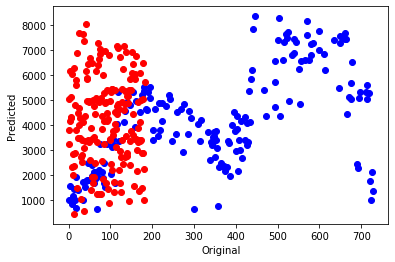

The model: LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=1, selection='cyclic',
        tol=0.0001, verbose=False)
946.6079370893054
The Coefficients:: [ 475.61401763 2138.52301582  -36.02042697   80.22137924   41.25920213
 6144.34391277]
6
Variance score: 0.77


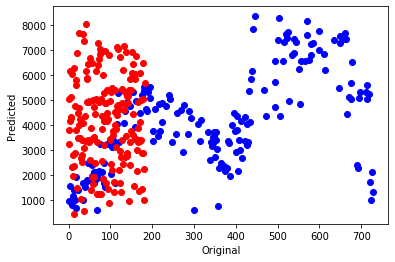

In [125]:


for i,model  in enumerate([lr,ls,lsv]):
     
        model.fit(X_train, y_train)
        predictt=model.predict(X_test)
        rmse = np.sqrt(np.mean((predictt - y_test) ** 2))
        print("The model:",model)
        print(rmse)
        print("The Coefficients::",model.coef_)
        coeff_used = np.sum(model.coef_!=0)
        print(coeff_used)
        print('Variance score: %.2f' % model.score(X_test, y_test))  
        plt.plot(y_test,'bo',predictt,'ro')
        plt.xlabel('Original')
        plt.ylabel('Predicted')
        plt.show()
    
